# Dynamic ecoregions

## Define inputs

In [1]:
# Inputs
input_file = "data/data-continental-united-states.csv"
geohash_precision = 4
log_file = "run.log"
output_file = "output.geojson"
num_clusters = 30

## Set up logging

In [2]:
import logging

logging.basicConfig(filename=log_file, encoding="utf-8", level=logging.INFO)

## Data flow

In [3]:
from src.mermaid import build_mermaid_graph

build_mermaid_graph()

## `DarwinCoreCsvLazyFrame`

### Build

In [4]:
from src.lazyframes.darwin_core_csv import DarwinCoreCsvLazyFrame

darwin_core_csv_lazy_frame = DarwinCoreCsvLazyFrame.build(input_file)

### Preview

In [5]:
darwin_core_csv_lazy_frame.lf.limit(3).collect()

gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
str,str,str,enum,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,u64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""4424226317""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Odonata""","""Libellulidae""","""Sympetrum""",null,null,"""GENUS""","""Sympetrum Newman, 1833""","""Sympetrum""",null,"""US""",null,"""New York""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",42.96266,-76.740947,"""2191.0""",null,null,null,null,null,"""2019-09-06T10:30""","""6""","""9""","""2019""",1428195,null,"""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32505913""",null,"""Amy Guala""","""2019-09-11T01:33:07""","""CC_BY_NC_4_0""","""Amy Guala""","""Amy Guala""",null,null,"""2024-12-03T00:52:33.467Z""","""StillImage""","""COORDINATE_ROUNDED;CONTINENT_D…"
"""2423028148""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Geometridae""","""Nematocampa""","""Nematocampa resistaria""",null,"""SPECIES""","""Nematocampa resistaria (Herric…","""Nematocampa resistaria""",null,"""US""",null,"""Vermont""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",43.822608,-72.641412,"""5.0""",null,null,null,null,null,"""2019-09-11T22:08:52""","""11""","""9""","""2019""",1991012,"""1991012""","""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32566956""",null,"""bugguytad""","""2019-09-12T02:25:38""","""CC_BY_NC_4_0""","""bugguytad""","""bugguytad""",null,null,"""2024-12-03T01:38:46.617Z""","""StillImage;StillImage;StillIma…","""COORDINATE_ROUNDED;CONTINENT_D…"
"""2423041120""","""50c9509d-22c7-4a22-a47d-8c4842…","""https://www.inaturalist.org/ob…","""Animalia""","""Arthropoda""","""Insecta""","""Odonata""","""Coenagrionidae""","""Argia""","""Argia moesta""",null,"""SPECIES""","""Argia moesta (Hagen, 1861)""","""Argia moesta""",null,"""US""",null,"""Texas""","""PRESENT""",null,"""28eb1a3f-1c15-4a95-931a-4af90e…",30.99463,-103.662658,null,null,null,null,null,null,"""2019-09-08T09:01""","""8""","""9""","""2019""",5051399,"""5051399""","""HUMAN_OBSERVATION""","""iNaturalist""","""Observations""","""32612673""",null,"""Todd Fitzgerald""","""2019-09-12T22:11:30""","""CC_BY_NC_4_0""","""Todd Fitzgerald""","""Todd Fitzgerald""",null,null,"""2024-12-03T01:38:10.816Z""","""StillImage""","""COORDINATE_ROUNDED;CONTINENT_D…"


## `GeohashDataFrame`

### Build

In [6]:
from src.dataframes.geohash import GeohashDataFrame

geohash_dataframe = GeohashDataFrame.build(
    darwin_core_csv_lazy_frame,
    geohash_precision,
)

### Shape

In [7]:
geohash_dataframe.df.shape

(20759, 3)

### Preview

In [8]:
geohash_dataframe.df.limit(6)

geohash,center,neighbors
str,struct[2],list[str]
"""97zz""","{22.412109,-112.675781}","[""9ebn""]"
"""9eb4""","{21.533203,-112.324219}",[]
"""9ebn""","{22.236328,-112.324219}","[""97zz""]"
"""9ebt""","{22.060547,-111.621094}",[]
"""9ebx""","{22.412109,-111.621094}",[]
"""9ec6""","{21.533203,-110.566406}","[""9ecd"", ""9ece""]"


## `TaxonomyDataFrame`

### Build

In [9]:
from src.dataframes.taxonomy import TaxonomyDataFrame

taxonomy_dataframe = TaxonomyDataFrame.build(darwin_core_csv_lazy_frame)

### Preview

In [10]:
taxonomy_dataframe.df.limit(3)

kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName
enum,str,str,str,str,str,str,str,str
"""Animalia""","""Arthropoda""","""Insecta""","""Lepidoptera""","""Geometridae""","""Hypomecis""","""Hypomecis laeca""","""SPECIES""","""Hypomecis laeca (Schaus, 1912)"""
"""Animalia""","""Arthropoda""","""Insecta""","""Coleoptera""","""Nitidulidae""","""Nitops""","""Nitops pallipennis""","""SPECIES""","""Nitops pallipennis (Say, 1823)"""
"""Plantae""","""Tracheophyta""","""Magnoliopsida""","""Solanales""","""Convolvulaceae""","""Ipomoea""","""Ipomoea squamosa""","""SPECIES""","""Ipomoea squamosa Choisy"""


## `GeohashSpeciesCountsDataFrame`

### Build

In [11]:
from src.dataframes.geohash_species_counts import GeohashSpeciesCountsDataFrame

geohash_taxa_counts_dataframe = GeohashSpeciesCountsDataFrame.build(
    darwin_core_csv_lazy_frame,
    geohash_precision,
)

### Shape

In [12]:
geohash_taxa_counts_dataframe.df.shape

(8123674, 5)

### Preview

In [13]:
geohash_taxa_counts_dataframe.df.limit(3)

geohash,kingdom,taxonRank,scientificName,count
str,enum,str,str,u32
"""97zz""","""Animalia""","""SPECIES""","""Eschrichtius robustus (Lilljeb…",1
"""9eb4""","""Animalia""","""SPECIES""","""Papilio rutulus Lucas, 1852""",1
"""9ebn""","""Animalia""","""SPECIES""","""Eschrichtius robustus (Lilljeb…",1


# `ConnectivityMatrix`

### Build

In [14]:
from src.matrices.connectivity import ConnectivityMatrix

connectivity_matrix = ConnectivityMatrix.build(geohash_dataframe)

More than one connected component (n=303), connecting the first with the closest node not in that component
Adding edge between 9ebn and 9s03
More than one connected component (n=302), connecting the first with the closest node not in that component
Adding edge between 9s03 and 9ebx
More than one connected component (n=301), connecting the first with the closest node not in that component
Adding edge between 9ebx and 9ebt
More than one connected component (n=300), connecting the first with the closest node not in that component
Adding edge between 9ebn and 9eb4
More than one connected component (n=299), connecting the first with the closest node not in that component
Adding edge between 9ebx and 9s0g
More than one connected component (n=298), connecting the first with the closest node not in that component
Adding edge between 9egw and 9egs
More than one connected component (n=297), connecting the first with the closest node not in that component
Adding edge between 9m7x and 9m7t
More t

### Preview

In [15]:
connectivity_matrix._connectivity_matrix

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], shape=(20759, 20759))

## `DistanceMatrix`

### Build

In [16]:
from src.matrices.distance import DistanceMatrix

distance_matrix = DistanceMatrix.build(
    geohash_taxa_counts_dataframe,
    geohash_dataframe,
)

### Preview

In [17]:
distance_matrix.squareform()

array([[0.        , 0.08834434, 0.        , ..., 0.0606778 , 0.14023975,
        0.13506384],
       [0.08834434, 0.        , 0.08834434, ..., 0.0609374 , 0.13517925,
        0.13032476],
       [0.        , 0.08834434, 0.        , ..., 0.0606778 , 0.14023975,
        0.13506384],
       ...,
       [0.0606778 , 0.0609374 , 0.0606778 , ..., 0.        , 0.12093976,
        0.1173058 ],
       [0.14023975, 0.13517925, 0.14023975, ..., 0.12093976, 0.        ,
        0.16501524],
       [0.13506384, 0.13032476, 0.13506384, ..., 0.1173058 , 0.16501524,
        0.        ]], shape=(20759, 20759))

## `GeohashClusterDataFrame`

### Build

In [21]:
from src.dataframes.geohash_cluster import GeohashClusterDataFrame

geohash_cluster_dataframe = GeohashClusterDataFrame.build(
    geohash_dataframe,
    distance_matrix,
    connectivity_matrix,
    # num_clusters,
    60,
)

### Preview

In [19]:
geohash_cluster_dataframe.df.limit(3)

geohash,cluster
str,u32
"""97zz""",23
"""9eb4""",23
"""9ebn""",23


In [20]:
# TMP

from src.dataframes.geohash_cluster import GeohashClusterDataFrame
from sklearn.metrics import silhouette_score

results = []

for i in range(2, 200):
    geohash_cluster_dataframe = GeohashClusterDataFrame.build(
        geohash_dataframe,
        distance_matrix,
        connectivity_matrix,
        num_clusters=i,
    )
    score = silhouette_score(
        X=distance_matrix.squareform(),
        labels=geohash_cluster_dataframe.df["cluster"],
        metric="precomputed",
    )
    print(f"{i}: {score}")
    results.append((i, score))

results


2: 0.16485492582527891
3: 0.11622373383669367
4: -0.1744782790110969
5: -0.15883634882412836
6: -0.1860999355258296
7: -0.18044889033379027
8: -0.17856758025531108
9: -0.17689420296691838
10: -0.17550606105914243
11: -0.17439916903155492
12: -0.17249944922140686
13: -0.17175245970897865
14: -0.16996210879405171
15: -0.16812256241810297
16: -0.1662424632750316
17: -0.16497774604407864
18: -0.16380669148977003
19: -0.16346003997556477
20: -0.1631213710066099
21: -0.16211185356012595
22: -0.16153244672138092
23: -0.1610123541648573
24: -0.16005219346552504
25: -0.15935317323264336
26: -0.15907568563000793
27: -0.1582297454880395
28: -0.15802676200971744
29: -0.15336741223783354
30: -0.15102910321405127
31: -0.15030367459887026
32: -0.1487151699607907
33: -0.14771884473595104
34: -0.14678204124991806
35: -0.14606863930911604
36: -0.14523676105581415
37: -0.14371170706224715
38: -0.14297773555184057
39: -0.1413537439098152
40: -0.1411900276828822
41: -0.14127289201632204
42: -0.140834205030

KeyboardInterrupt: 

## `ClusterColorDataFrame`

### Build

In [24]:
from src.dataframes.cluster_color import ClusterColorDataFrame

cluster_colors_dataframe = ClusterColorDataFrame.build(geohash_cluster_dataframe)

### Preview

In [25]:
cluster_colors_dataframe.df.limit(3)

cluster,color
u32,str
0,"""#a60a44"""
1,"""#af1446"""
2,"""#b71d48"""


## Silhouette score

In [22]:

from sklearn.metrics import silhouette_score

silhouette_score(
    X=distance_matrix.squareform(),
    labels=geohash_cluster_dataframe.df["cluster"],
    metric="precomputed",
)


np.float64(-0.13258868847729213)

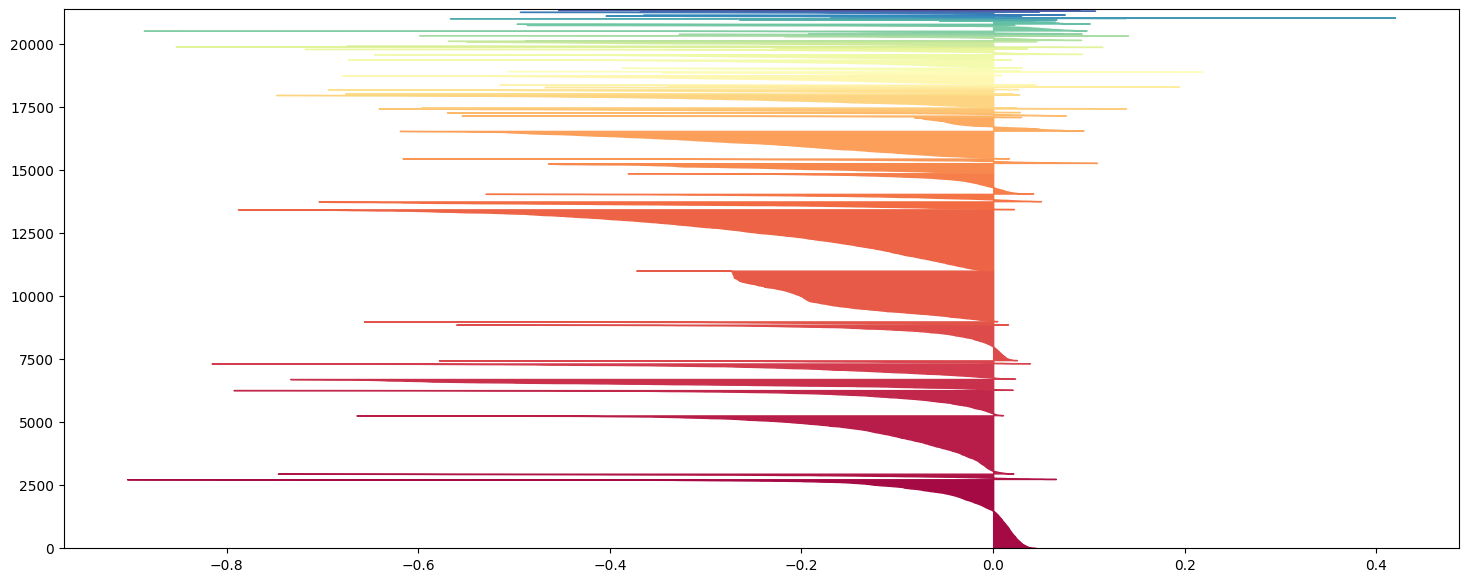

In [26]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

samples = silhouette_samples(
    X=distance_matrix.squareform(),
    labels=geohash_cluster_dataframe.df["cluster"],
    metric="precomputed",
)

new = geohash_cluster_dataframe.df.with_columns(
    pl.Series(
        name="sample",
        values=samples,
    )
)

n_clusters = len(geohash_cluster_dataframe.df["cluster"].unique())
n_geohashes = len(distance_matrix.squareform())

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
# ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, n_geohashes + (n_clusters + 1) * 10])

y_lower = 10
for i, cluster in enumerate(geohash_cluster_dataframe.df["cluster"].unique()):
    ith_cluster_silhouette_values = (new.filter(pl.col("cluster") == cluster).sort("sample", descending=True))["sample"]

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color =  cluster_colors_dataframe.get_color_for_cluster(cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
    )

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples


## `ClusterTaxaStatisticsDataFrame`

### Build

In [27]:
from src.dataframes.cluster_taxa_statistics import ClusterTaxaStatisticsDataFrame

cluster_taxa_statistics_dataframe = ClusterTaxaStatisticsDataFrame.build(
    geohash_taxa_counts_dataframe,
    geohash_cluster_dataframe,
    taxonomy_dataframe,
)

### Preview

In [28]:
cluster_taxa_statistics_dataframe.df.limit(3)

cluster,kingdom,taxonRank,scientificName,count,average
u32,enum,str,str,u32,f64
null,"""Fungi""","""SPECIES""","""Ramaria stuntzii Marr""",21,4.0839e-7
null,"""Animalia""","""SUBSPECIES""","""Malacosoma californica pluvial…",1,1.9447e-8
null,"""Animalia""","""SPECIES""","""Dolichonyx oryzivorus (Linnaeu…",7172,0.000139


## `ClusterSignificantDifferencesDataFrame`

### Build

In [29]:
from src.dataframes.cluster_significant_differences import ClusterSignificantDifferencesDataFrame

cluster_significant_differences_dataframe = ClusterSignificantDifferencesDataFrame.build(
    cluster_taxa_statistics_dataframe,
)

### Preview

In [30]:
cluster_significant_differences_dataframe.df.limit(3)

cluster,kingdom,taxonRank,scientificName,percentage_difference
u32,str,str,str,f64
0,"""Animalia""","""SPECIES""","""Sciurus carolinensis Gmelin, 1…",70.188656
0,"""Animalia""","""SPECIES""","""Bombus impatiens Cresson, 1863""",93.273097
0,"""Animalia""","""SPECIES""","""Turdus migratorius Linnaeus, 1…",38.046594


## Build and plot GeoJSON feature collection

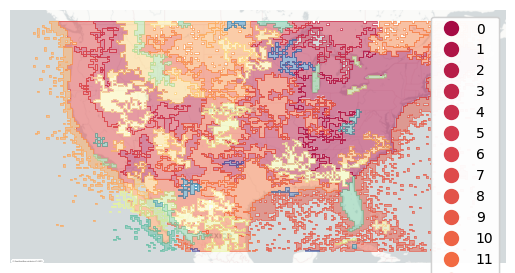

In [31]:
from src.geojson import build_geojson_feature_collection, write_geojson
from src.render import plot_clusters
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = [12, 7]

feature_collection = build_geojson_feature_collection(
    geohash_cluster_dataframe,
    cluster_colors_dataframe,
)

# print_results(darwin_core_aggregations, all_stats, cluster_dataframe)

write_geojson(feature_collection, output_file)

plot_clusters(feature_collection)

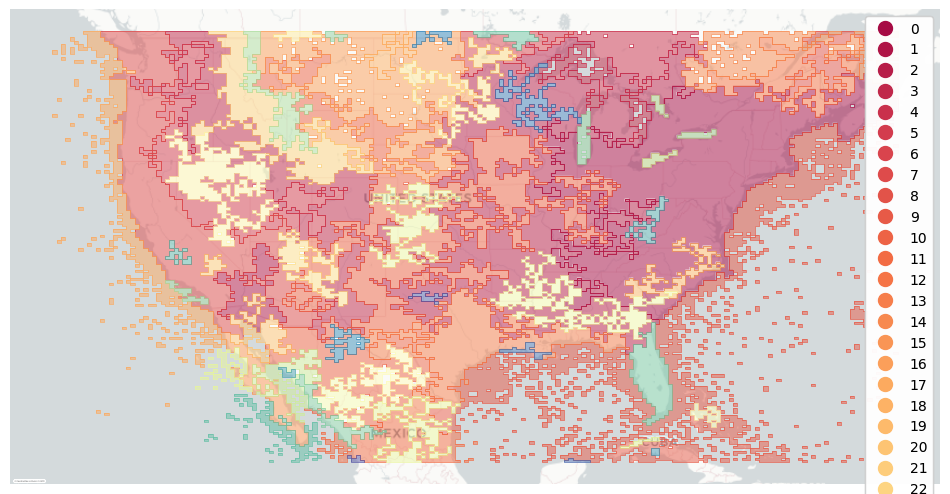

<Figure size 1800x700 with 0 Axes>

In [ ]:
from matplotlib.lines import Line2D
import geopandas
import contextily
import geojson

def plot_clusters2(
    feature_collection: geojson.FeatureCollection,
) -> None:
    geojson_gdf = geopandas.GeoDataFrame.from_features(
        feature_collection["features"], crs="EPSG:4326"
    )
    geojson_gdf_wm = geojson_gdf.to_crs(epsg=3857)

    ax = geojson_gdf_wm.plot(
        color=geojson_gdf_wm["fill"],
        categorical=True,
        linewidth=0,
        alpha=0.5,
    )
    geojson_gdf_wm.boundary.plot(
        ax=ax,
        color=geojson_gdf_wm["fill"],
        linewidth=0.5,
        alpha=1,
    )

    # Add a legend
    cluster_and_fill = geojson_gdf_wm[["cluster", "fill"]]
    custom_points = [
        Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=row.fill)
        for row in cluster_and_fill.itertuples()
    ]
    leg_points = ax.legend(custom_points, cluster_and_fill["cluster"].unique())
    ax.add_artist(leg_points)

    contextily.add_basemap(
        ax, source=contextily.providers.CartoDB.Positron, attribution_size=0
    )

    f = plt.figure()
    f.set_figwidth(18)
    f.set_figheight(7)

    ax.set_axis_off()
    plt.show()
    # os.makedirs("output", exist_ok=True)
    # plt.savefig(f"output/{num_clusters}.png")

plot_clusters2(feature_collection)

# Build and display HTML output

In [32]:
from src.html_output import build_html_output
from IPython.display import display, HTML

html = build_html_output(
    cluster_colors_dataframe,
    cluster_significant_differences_dataframe,
)

display(HTML(html))


In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    random_state=42,
    metric="precomputed",
    init="random",
    perplexity=min(30, distance_matrix.squareform().shape[0] - 1), # HACK FOR SMALLER DATASETS
)
X_tsne = tsne.fit_transform(distance_matrix.squareform())
tsne.kl_divergence_


2.449552536010742

<Axes: >

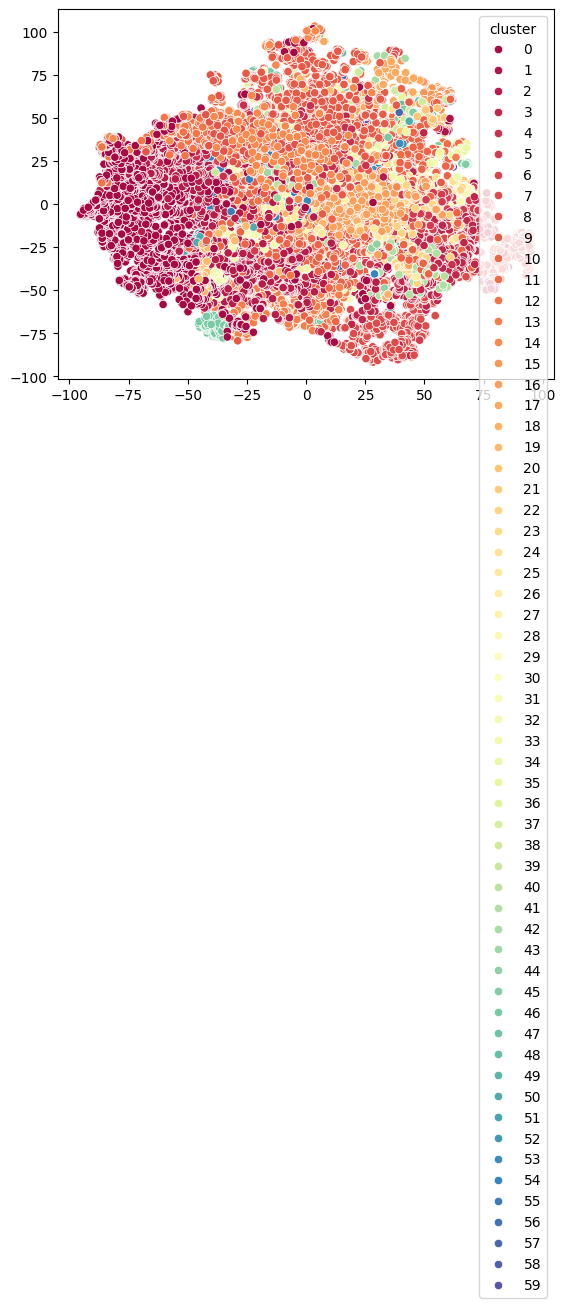

In [34]:
import seaborn as sns

sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=geohash_cluster_dataframe.df["cluster"],
    palette=cluster_colors_dataframe.to_dict(),
    alpha=1,
)

In [35]:
import seaborn as sns
import polars as pl
from scipy.cluster.hierarchy import linkage


linkage_array = linkage(distance_matrix.condensed(), "ward")

ordered_geohashes = geohash_dataframe.df["geohash"].unique()

def min_max_normalize(series: pl.Series) -> pl.Series:
    return (series - series.min()) / (series.max() - series.min())

col_colors = []
for geohash in ordered_geohashes:
    cluster = geohash_cluster_dataframe.cluster_for_geohash(geohash)
    col_colors.append(cluster_colors_dataframe.get_color_for_cluster(cluster))

data = {}
for species in cluster_significant_differences_dataframe.df["taxon"].unique():
    counts = []

    for geohash in ordered_geohashes:
        geohash_counts_species = geohash_taxa_counts_dataframe.df.filter(
            pl.col("geohash") == geohash, pl.col("name") == species
        ).get_column("count").sum()
        geohash_counts_all = geohash_taxa_counts_dataframe.df.filter(
            pl.col("geohash") == geohash
        ).get_column("count").sum()
        geohash_average = geohash_counts_species / geohash_counts_all
        all_average = (
            cluster_taxa_statistics_dataframe.df.filter(
                # pl.col("kingdom") == kingdom, FIXME
                pl.col("name") == species,
                pl.col("cluster").is_null(),
                pl.col("rank") == TaxonRank.species,
            )
            .get_column("average")
            .item()
        )
        counts.append(geohash_average - all_average)
    counts = pl.Series(
        values=counts,
        name=species,
    )
    # counts = counts / counts.max()
    # counts = counts.pow(1 / 3)
    data[species] = min_max_normalize(counts)


ColumnNotFoundError: "taxon" not found

In [ ]:
data

In [ ]:
dataframe = pl.DataFrame(data=data)
sns.clustermap(
    data=dataframe,
    col_cluster=False,
    row_cluster=True,
    row_linkage=linkage_array,
    row_colors=col_colors,
    xticklabels=dataframe.columns,
    yticklabels=False,
)